In [12]:
import warnings
warnings.filterwarnings("ignore")

In [13]:
import os 
import json
import numpy as np
import matplotlib.pyplot as plt
import functools
import nltk
!pip install xgboost
import xgboost as xgb
import re
import seaborn as sn
import pandas as pd
from difflib import get_close_matches
import time 

# Visualization
#!pip install plotly
#import plotly.express as px

#!pip install emoji
from emoji import UNICODE_EMOJI

# Sklearn
    
import sklearn
from sklearn.model_selection import train_test_split, cross_validate, KFold
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC, LinearSVC # for Support Vector Classification baseline model
from sklearn.naive_bayes import GaussianNB, ComplementNB, MultinomialNB
from sklearn.semi_supervised import SelfTrainingClassifier # for Semi-Supervised learning
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score # for model evaluation metrics
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


import math

contents = []
with open("rumour-annotation-2_annotations.json", 'rb') as j:
     contents.append(json.loads(j.read()))
contents2 = []
with open("rumour-annotation-3_annotations.json", 'rb') as j:
     contents2.append(json.loads(j.read()))
        
contents3 = []
with open("rumour-annotation_annotations.json", 'rb') as j:
     contents3.append(json.loads(j.read()))

contents4 = []
with open("rumour-annotation-4_annotations.json", 'rb') as j:
     contents4.append(json.loads(j.read()))



[notice] A new release of pip available: 22.2.2 -> 23.0.1
[notice] To update, run: pip install --upgrade pip


In [33]:
def filter_duplicates(rawdata,columns):
    texts = list(rawdata["text"])
    
    nonduplicates = set()

    new_data = pd.DataFrame(columns=columns)#[]
    
    print(texts[0])
    
    for i in range(len(texts)):
        if texts[i] not in nonduplicates:
            new_data = new_data.append(rawdata.iloc[i])
        nonduplicates.add(texts[i])
    
    return new_data

In [34]:
columns = ["followers_count",
          "tweet_count",
          "question_marks",
          "verified",
          "accountlife",
          "followers_ratio",
          "exclamation_marks",
          "capital letters",
          "retweet_count",
          "hashtags",
          "following",
          "text length",
          "listed_count",
          "emoticons",
          "like_count",
          "time_after_posting",
          "activity",
          "text",
          "hashtag",
          "upsample_group",
          "label"]
df = pd.read_csv("DutchTwitterData.csv", sep="\t").drop('Unnamed: 0',axis=1)

In [35]:
df1 = df[df["hashtag"]=="#jinek"]
df2 = df[df["hashtag"]=="#inflatie"]
df3 = df[df["hashtag"]=="#vleestaks"]

df1 = filter_duplicates(df1,columns)
df3 = filter_duplicates(df3,columns)
df2 = filter_duplicates(df2,columns)
df = pd.concat([df1, df2, df3])
df

#nosjournaal #buitenhof #eenvandaag #op1 @denieuwsbv #op1npo #Nieuwsuur #beau  #Humberto #Jinek #wnlopzondag #wnl

https://t.co/HYGA2xsrq5
RT @Woutel: De reacties op de hashtags #vleestaks en #vliegtaks maken pijnlijk zichtbaar dat we niet in staat zijn om logisch na te denken…
RT @overveenerick: Het feit dat de inflatie in niet-EU-landen onder de 2% blijft (Niet EU-land Zwitserland zit op 1,86%) geeft aan dat ONZE…


,followers_count,tweet_count,question_marks,verified,accountlife,followers_ratio,exclamation_marks,capital letters,retweet_count,hashtags,...,text length,listed_count,emoticons,like_count,time_after_posting,activity,text,hashtag,upsample_group,label
0,0.000016,0.002909,0.0,0.0,0.002835,0.000088,0.0,0.028914,0.000000,1.0,...,0.146830,0.000000,0.0,0.000000,0.910891,0.981275,#nosjournaal #buitenhof #eenvandaag #op1 @deni...,#jinek,-1#jinek,-1.0
2,0.001251,0.011679,0.0,0.0,0.002836,0.000105,0.0,0.037175,0.000327,1.0,...,0.142380,0.004799,0.0,0.000000,0.155891,0.981256,RT @Quadenmakelaars: https://t.co/KO6Aw33rtg\n...,#jinek,-1#jinek,-1.0
4,0.000053,0.009421,0.0,0.0,0.002838,0.000088,0.0,0.204461,0.000000,1.0,...,0.322581,0.000800,0.0,0.000000,0.648938,0.981257,#buitenhof\n\nGaaaaaaaaf land NL\n\n#rutte @Mi...,#jinek,-1#jinek,-1.0
6,0.000205,0.01512,0.0,0.0,0.002838,0.000270,0.0,0.037175,0.000327,1.0,...,0.149055,0.007998,0.0,0.000000,0.226822,0.981254,RT @KeesVanLunsen_: Het laatste waar #Oekraïne...,#jinek,-1#jinek,-1.0
8,0.000205,0.01512,1.0,0.0,0.002838,0.000270,0.0,0.066088,0.000654,1.0,...,0.149055,0.007998,0.0,0.000000,0.226822,0.981254,RT @CONCIES_Heiloo: Een #wet om #fastfood aan ...,#jinek,-1#jinek,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372636,0.0,0.0,1.0,0.0,0.971489,0.000000,1.0,0.028914,0.000000,1.0,...,0.120133,0.000000,0.0,0.000000,1.000000,0.025921,"#Vleestaks? ""Vlees eten niet meer zo vanzelfsp...",#vleestaks,-1#vleestaks,-1.0
372638,0.0,0.0,0.0,0.0,0.971520,0.000000,0.0,0.028914,0.000000,1.0,...,0.066741,0.000000,0.0,0.000000,1.000000,0.025892,RT @ThE_ED: Misschien moet ik zelf gewoon een ...,#vleestaks,-1#vleestaks,-1.0
372640,0.0,0.0,0.0,0.0,0.971521,0.000000,0.0,0.004131,0.000000,1.0,...,0.053393,0.000000,0.0,0.000000,1.000000,0.025891,Misschien moet ik zelf gewoon een koe kopen #v...,#vleestaks,-1#vleestaks,-1.0
372642,0.0,0.0,1.0,0.0,0.971522,0.000000,0.0,0.004131,0.000000,1.0,...,0.146830,0.000000,0.0,0.000000,1.000000,0.025891,"#vleestaks, #vettaks, #bonustaks, wie verzint ...",#vleestaks,-1#vleestaks,-1.0


In [36]:
def upsample(df):
    unique_upsample_groups = np.unique(df["upsample_group"],return_counts=True)
    unique_upsample_groups = list(zip(unique_upsample_groups[0], unique_upsample_groups[1]))
    
    biggest_group = unique_upsample_groups[[j for (i,j) in unique_upsample_groups].index(max([j for (i,j) in unique_upsample_groups]))][0]
    other_groups = [i[0] for i in unique_upsample_groups if i[0] != biggest_group]
    
    rows = [np.random.choice(df[df["upsample_group"] == i].index, size=len(df[df["upsample_group"] == biggest_group]), replace=True) for i in other_groups]

    new_df = df.loc[rows[0][0]].to_frame().transpose()
    for g in rows:
        for r in g:
            new_df = pd.concat([new_df, df.loc[r].to_frame().transpose()])
    
    new_df = pd.concat([new_df,df[df["upsample_group"] == biggest_group]]).sample(frac=1).reset_index()#.drop(["level_0", "index"], axis=1)
    
    return new_df

In [37]:
#####
#https://stackoverflow.com/questions/73561053/how-to-fit-a-model-using-cross-validation
#
#

In [48]:
#XGBoost
output = []
feature_importances = []
roc_scores = []


df_labeled=df[df["label"]!=-1]
df_train, df_test = train_test_split(df_labeled, test_size=0.2)
df_train.reset_index(drop=True)

#upsample
model = xgb.XGBClassifier(objective="binary:logistic")

for i in range(0,99):
    kf5 = KFold(n_splits=5, shuffle=False)
    rn = range(1,len(df_train))
    i = 1
    scores = []
    for train_index, test_index in kf5.split(rn):
        X_train = df_train.iloc[train_index].reset_index(drop=True)
        X_train = upsample(X_train).drop(["hashtag", "upsample_group", "text","index"], axis=1)
        y_train = X_train["label"].astype(float).sample(frac=1)
        X_train = X_train.drop(["label"], axis = 1).astype(float)

        X_val = df_train.iloc[test_index].reset_index(drop=True)
        X_val = upsample(X_val).drop(["hashtag", "upsample_group", "text","index"], axis=1).astype(float)
        y_val = X_val["label"].astype(float).sample(frac=1)
        X_val = X_val.drop(["label"], axis = 1).astype(float)

        model.fit(X_train,y_train)
        scores.append(roc_auc_score(y_val, model.predict(X_val)))

        i += 1
    scores = np.mean(scores)

    roc_scores.append(scores)
    feature_importances.append(model.feature_importances_)
    
scores = []
for train_index, test_index in kf5.split(rn):
    X_train = df_train.iloc[train_index].reset_index(drop=True)
    X_train = upsample(X_train).drop(["hashtag", "upsample_group", "text","index"], axis=1)
    y_train = X_train["label"].astype(float)
    X_train = X_train.drop(["label"], axis = 1).astype(float)

    X_val = df_train.iloc[test_index].reset_index(drop=True)
    X_val = upsample(X_val).drop(["hashtag", "upsample_group", "text","index"], axis=1).astype(float)
    y_val = X_val["label"].astype(float)
    X_val = X_val.drop(["label"], axis = 1).astype(float)

    model.fit(X_train,y_train)
    scores.append(roc_auc_score(y_val, model.predict(X_val)))
    
    i += 1
pred = np.mean(scores)
    
mean = sum(roc_scores)/len(roc_scores)
stdev = math.sqrt(sum([(x - mean) ** 2 for x in roc_scores])/len(roc_scores))

print(mean)
print(stdev)

print(pred)


C = sum([i for i in roc_scores if i>pred])
pvalue = (C+1)/(101)
print(pvalue)

xgb_avg_feature_importances = []
for i in range(0,17):
    temp = []
    for x in feature_importances:
        temp.append(x[i])
    xgb_avg_feature_importances.append(sum(temp)/len(temp))


0.4994353279029863
0.00837698624217352
0.809058371094045
0.009900990099009901


In [58]:
#MNB
output = []
feature_importances = []
roc_scores = []


df_labeled=df[df["label"]!=-1]
df_train, df_test = train_test_split(df_labeled, test_size=0.2)
df_train.reset_index(drop=True)

#upsample
model = MultinomialNB(alpha=0, fit_prior=False)

for i in range(0,99):
    kf5 = KFold(n_splits=5, shuffle=False)
    rn = range(1,len(df_train))
    i = 1
    scores = []
    for train_index, test_index in kf5.split(rn):
        X_train = df_train.iloc[train_index].reset_index(drop=True)
        X_train = upsample(X_train).drop(["hashtag", "upsample_group", "text","index"], axis=1)
        y_train = X_train["label"].astype(float).sample(frac=1)
        X_train = X_train.drop(["label"], axis = 1).astype(float)

        X_val = df_train.iloc[test_index].reset_index(drop=True)
        X_val = upsample(X_val).drop(["hashtag", "upsample_group", "text","index"], axis=1).astype(float)
        y_val = X_val["label"].astype(float).sample(frac=1)
        X_val = X_val.drop(["label"], axis = 1).astype(float)

        model.fit(X_train,y_train)
        scores.append(roc_auc_score(y_val, model.predict(X_val)))

        i += 1
    scores = np.mean(scores)

    roc_scores.append(scores)
    
scores = []
for train_index, test_index in kf5.split(rn):
    X_train = df_train.iloc[train_index].reset_index(drop=True)
    X_train = upsample(X_train).drop(["hashtag", "upsample_group", "text","index"], axis=1)
    y_train = X_train["label"].astype(float)
    X_train = X_train.drop(["label"], axis = 1).astype(float)

    X_val = df_train.iloc[test_index].reset_index(drop=True)
    X_val = upsample(X_val).drop(["hashtag", "upsample_group", "text","index"], axis=1).astype(float)
    y_val = X_val["label"].astype(float)
    X_val = X_val.drop(["label"], axis = 1).astype(float)

    model.fit(X_train,y_train)
    scores.append(roc_auc_score(y_val, model.predict(X_val)))

    i += 1
pred = np.mean(scores)
    
mean = sum(roc_scores)/len(roc_scores)
stdev = math.sqrt(sum([(x - mean) ** 2 for x in roc_scores])/len(roc_scores))

print(mean)
print(stdev)

print(pred)


C = sum([i for i in roc_scores if i>pred])
pvalue = (C+1)/(101)
print(pvalue) 

0.5002608030211283
0.007488829144128252
0.6119487674382105
0.009900990099009901


In [59]:
#LinearSVM
output = []
feature_importances = []
roc_scores = []


df_labeled=df[df["label"]!=-1]
df_train, df_test = train_test_split(df_labeled, test_size=0.2)
df_train.reset_index(drop=True)

#upsample
model = SVC(kernel='linear',
                            probability=True,
                            C=1.0, # default = 1.0
                            max_iter = 1000,
                            gamma='scale', # default = 'scale',
                       )

for i in range(0,99):
    kf5 = KFold(n_splits=5, shuffle=False)
    rn = range(1,len(df_train))
    i = 1
    scores = []
    for train_index, test_index in kf5.split(rn):
        X_train = df_train.iloc[train_index].reset_index(drop=True)
        X_train = upsample(X_train).drop(["hashtag", "upsample_group", "text","index"], axis=1)
        y_train = X_train["label"].astype(float).sample(frac=1)
        X_train = X_train.drop(["label"], axis = 1).astype(float)

        X_val = df_train.iloc[test_index].reset_index(drop=True)
        X_val = upsample(X_val).drop(["hashtag", "upsample_group", "text","index"], axis=1).astype(float)
        y_val = X_val["label"].astype(float).sample(frac=1)
        X_val = X_val.drop(["label"], axis = 1).astype(float)


        model.fit(X_train,y_train)
        scores.append(roc_auc_score(y_val, model.predict(X_val)))

        i += 1
    scores = np.mean(scores)

    roc_scores.append(scores)
    feature_importances.append(model.coef_)
    
scores = []
for train_index, test_index in kf5.split(rn):
    X_train = df_train.iloc[train_index].reset_index(drop=True)
    X_train = upsample(X_train).drop(["hashtag", "upsample_group", "text","index"], axis=1)
    y_train = X_train["label"].astype(float)
    X_train = X_train.drop(["label"], axis = 1).astype(float)


    X_val = df_train.iloc[test_index].reset_index(drop=True)
    X_val = upsample(X_val).drop(["hashtag", "upsample_group", "text","index"], axis=1).astype(float)
    y_val = X_val["label"].astype(float)
    X_val = X_val.drop(["label"], axis = 1).astype(float)

    model.fit(X_train,y_train)
    scores.append(roc_auc_score(y_val, model.predict(X_val)))

    i += 1
pred = np.mean(scores)
    
mean = sum(roc_scores)/len(roc_scores)
stdev = math.sqrt(sum([(x - mean) ** 2 for x in roc_scores])/len(roc_scores))

print(mean)
print(stdev)

print(pred)


C = sum([i for i in roc_scores if i>pred])
pvalue = (C+1)/(101)
print(pvalue)


lsvm_avg_feature_importances = []
for i in range(0,17):
    temp = []
    for x in feature_importances:
        temp.append(x)
    lsvm_avg_feature_importances.append(sum(temp)/len(temp))

0.4998125131537299
0.004903205927549765
0.7027249282287779
0.009900990099009901


In [66]:
#RF
output = []
feature_importances = []
roc_scores = []


df_labeled=df[df["label"]!=-1]
df_train, df_test = train_test_split(df_labeled, test_size=0.2)
df_train.reset_index(drop=True)

model = RandomForestClassifier()

for i in range(0,99):
    kf5 = KFold(n_splits=5, shuffle=False)
    rn = range(1,len(df_train))
    i = 1
    scores = []
    for train_index, test_index in kf5.split(rn):
        X_train = df_train.iloc[train_index].reset_index(drop=True)
        X_train = upsample(X_train).drop(["hashtag", "upsample_group", "text","index"], axis=1)
        y_train = X_train["label"].astype(float).sample(frac=1)
        X_train = X_train.drop(["label"], axis = 1).astype(float)

        X_val = df_train.iloc[test_index].reset_index(drop=True)
        X_val = upsample(X_val).drop(["hashtag", "upsample_group", "text","index"], axis=1).astype(float)
        y_val = X_val["label"].astype(float).sample(frac=1)
        X_val = X_val.drop(["label"], axis = 1).astype(float)

        model.fit(X_train,y_train)
        scores.append(roc_auc_score(y_val, model.predict(X_val)))

        i += 1
    scores = np.mean(scores)

    roc_scores.append(scores)
    feature_importances.append(model.feature_importances_)
    
scores = []
for train_index, test_index in kf5.split(rn):
    X_train = df_train.iloc[train_index].reset_index(drop=True)
    X_train = upsample(X_train).drop(["hashtag", "upsample_group", "text","index"], axis=1)
    y_train = X_train["label"].astype(float)
    X_train = X_train.drop(["label"], axis = 1).astype(float)

    X_val = df_train.iloc[test_index].reset_index(drop=True)
    X_val = upsample(X_val).drop(["hashtag", "upsample_group", "text","index"], axis=1).astype(float)
    y_val = X_val["label"].astype(float)
    X_val = X_val.drop(["label"], axis = 1).astype(float)

    model.fit(X_train,y_train)
    scores.append(roc_auc_score(y_val, model.predict(X_val)))

    i += 1
pred = np.mean(scores)
    
mean = sum(roc_scores)/len(roc_scores)
stdev = math.sqrt(sum([(x - mean) ** 2 for x in roc_scores])/len(roc_scores))

print(mean)
print(stdev)

print(pred)


C = sum([i for i in roc_scores if i>pred])
pvalue = (C+1)/(101)
print(pvalue)
rf_avg_feature_importances = []
for i in range(0,17):
    temp = []
    for x in feature_importances:
        temp.append(x[i])
    rf_avg_feature_importances.append(sum(temp)/len(temp))    

0.4986837047968473
0.00836663674409125
0.7904786260625144
0.009900990099009901


In [61]:
#MLP
output = []
feature_importances = []
roc_scores = []


df_labeled=df[df["label"]!=-1]
df_train, df_test = train_test_split(df_labeled, test_size=0.2)
df_train.reset_index(drop=True)

model = MLPClassifier(max_iter=300)

for i in range(0,99):
    kf5 = KFold(n_splits=5, shuffle=False)
    rn = range(1,len(df_train))
    i = 1
    scores = []
    for train_index, test_index in kf5.split(rn):
        X_train = df_train.iloc[train_index].reset_index(drop=True)
        X_train = upsample(X_train).drop(["hashtag", "upsample_group", "text","index"], axis=1)
        y_train = X_train["label"].astype(float).sample(frac=1)
        X_train = X_train.drop(["label"], axis = 1).astype(float)

        X_val = df_train.iloc[test_index].reset_index(drop=True)
        X_val = upsample(X_val).drop(["hashtag", "upsample_group", "text","index"], axis=1).astype(float)
        y_val = X_val["label"].astype(float).sample(frac=1)
        X_val = X_val.drop(["label"], axis = 1).astype(float)


        model.fit(X_train,y_train)
        scores.append(roc_auc_score(y_val, model.predict(X_val)))

        i += 1
    scores = np.mean(scores)

    roc_scores.append(scores)

    
scores = []
for train_index, test_index in kf5.split(rn):
    X_train = df_train.iloc[train_index].reset_index(drop=True)
    X_train = upsample(X_train).drop(["hashtag", "upsample_group", "text","index"], axis=1)
    y_train = X_train["label"].astype(float)
    X_train = X_train.drop(["label"], axis = 1).astype(float)


    X_val = df_train.iloc[test_index].reset_index(drop=True)
    X_val = upsample(X_val).drop(["hashtag", "upsample_group", "text","index"], axis=1).astype(float)
    y_val = X_val["label"].astype(float)
    X_val = X_val.drop(["label"], axis = 1).astype(float)


    model.fit(X_train,y_train)
    scores.append(roc_auc_score(y_val, model.predict(X_val)))

    i += 1
pred = np.mean(scores)
    
mean = sum(roc_scores)/len(roc_scores)
stdev = math.sqrt(sum([(x - mean) ** 2 for x in roc_scores])/len(roc_scores))

print(mean)
print(stdev)

print(pred)


C = sum([i for i in roc_scores if i>pred])
pvalue = (C+1)/(101)
print(pvalue)
  

0.5000283065079394
0.007788065465536347
0.776203574636439
0.009900990099009901


In [63]:
#GBC
output = []
feature_importances = []
roc_scores = []


df_labeled=df[df["label"]!=-1]
df_train, df_test = train_test_split(df_labeled, test_size=0.2)
df_train.reset_index(drop=True)

model = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)

for i in range(0,99):
    kf5 = KFold(n_splits=5, shuffle=False)
    rn = range(1,len(df_train))
    i = 1
    scores = []
    for train_index, test_index in kf5.split(rn):
        X_train = df_train.iloc[train_index].reset_index(drop=True)
        X_train = upsample(X_train).drop(["hashtag", "upsample_group", "text","index"], axis=1)
        y_train = X_train["label"].astype(float).sample(frac=1)
        X_train = X_train.drop(["label"], axis = 1).astype(float)

        X_val = df_train.iloc[test_index].reset_index(drop=True)
        X_val = upsample(X_val).drop(["hashtag", "upsample_group", "text","index"], axis=1).astype(float)
        y_val = X_val["label"].astype(float).sample(frac=1)
        X_val = X_val.drop(["label"], axis = 1).astype(float)

        model.fit(X_train,y_train)
        scores.append(roc_auc_score(y_val, model.predict(X_val)))
        
        i += 1
    scores = np.mean(scores)

    roc_scores.append(scores)
    feature_importances.append(model.feature_importances_)
    
scores = []
for train_index, test_index in kf5.split(rn):
    X_train = df_train.iloc[train_index].reset_index(drop=True)
    X_train = upsample(X_train).drop(["hashtag", "upsample_group", "text","index"], axis=1)
    y_train = X_train["label"].astype(float)
    X_train = X_train.drop(["label"], axis = 1).astype(float)

    X_val = df_train.iloc[test_index].reset_index(drop=True)
    X_val = upsample(X_val).drop(["hashtag", "upsample_group", "text","index"], axis=1).astype(float)
    y_val = X_val["label"].astype(float)
    X_val = X_val.drop(["label"], axis = 1).astype(float)

    model.fit(X_train,y_train)
    scores.append(roc_auc_score(y_val, model.predict(X_val)))
    
    i += 1
pred = np.mean(scores)
    
mean = sum(roc_scores)/len(roc_scores)
stdev = math.sqrt(sum([(x - mean) ** 2 for x in roc_scores])/len(roc_scores))

print(mean)
print(stdev)

print(pred)


C = sum([i for i in roc_scores if i>pred])
pvalue = (C+1)/(101)
print(pvalue)
gbc_avg_feature_importances = []
for i in range(0,17):
    temp = []
    for x in feature_importances:
        temp.append(x[i])
    gbc_avg_feature_importances.append(sum(temp)/len(temp))

0.5003754250266991
0.008193938901953059
0.8125657496534346
0.009900990099009901


In [64]:
#GNB
output = []
feature_importances = []
roc_scores = []


df_labeled=df[df["label"]!=-1]
df_train, df_test = train_test_split(df_labeled, test_size=0.2)
df_train.reset_index(drop=True)

model = GaussianNB()

for i in range(0,99):
    kf5 = KFold(n_splits=5, shuffle=False)
    rn = range(1,len(df_train))
    i = 1
    scores = []
    for train_index, test_index in kf5.split(rn):
        X_train = df_train.iloc[train_index].reset_index(drop=True)
        X_train = upsample(X_train).drop(["hashtag", "upsample_group", "text","index"], axis=1)
        y_train = X_train["label"].astype(float).sample(frac=1)
        X_train = X_train.drop(["label"], axis = 1).astype(float)

        X_val = df_train.iloc[test_index].reset_index(drop=True)
        X_val = upsample(X_val).drop(["hashtag", "upsample_group", "text","index"], axis=1).astype(float)
        y_val = X_val["label"].astype(float).sample(frac=1)
        X_val = X_val.drop(["label"], axis = 1).astype(float)

        model.fit(X_train,y_train)
        scores.append(roc_auc_score(y_val, model.predict(X_val)))
        
        i += 1
    scores = np.mean(scores)

    roc_scores.append(scores)
    
scores = []
for train_index, test_index in kf5.split(rn):
    X_train = df_train.iloc[train_index].reset_index(drop=True)
    X_train = upsample(X_train).drop(["hashtag", "upsample_group", "text","index"], axis=1)
    y_train = X_train["label"].astype(float)
    X_train = X_train.drop(["label"], axis = 1).astype(float)

    X_val = df_train.iloc[test_index].reset_index(drop=True)
    X_val = upsample(X_val).drop(["hashtag", "upsample_group", "text","index"], axis=1).astype(float)
    y_val = X_val["label"].astype(float)
    X_val = X_val.drop(["label"], axis = 1).astype(float)

    model.fit(X_train,y_train)
    scores.append(roc_auc_score(y_val, model.predict(X_val)))
    i += 1
pred = np.mean(scores)
    
mean = sum(roc_scores)/len(roc_scores)
stdev = math.sqrt(sum([(x - mean) ** 2 for x in roc_scores])/len(roc_scores))

print(mean)
print(stdev)

print(pred)


C = sum([i for i in roc_scores if i>pred])
pvalue = (C+1)/(101)
print(pvalue)  

0.5003104587766831
0.005130742621779723
0.5251776887363
0.009900990099009901


In [134]:
#Non linear SVM
output = []
feature_importances = []
roc_scores = []


df_labeled=df[df["label"]!=-1]
df_train, df_test = train_test_split(df_labeled, test_size=0.2)
df_train.reset_index(drop=True)

#upsample
model = SVC(kernel='rbf',
                            probability=True,
                            C=1.0, # default = 1.0
                            max_iter = 1000,
                            gamma='scale', # default = 'scale',
                       )

for i in range(0,99):
    kf5 = KFold(n_splits=5, shuffle=False)
    rn = range(1,len(df_train))
    i = 1
    scores = []
    for train_index, test_index in kf5.split(rn):
        X_train = df_train.iloc[train_index].reset_index(drop=True)
        X_train = upsample(X_train).drop(["hashtag", "upsample_group", "text","index"], axis=1)
        y_train = X_train["label"].astype(float).sample(frac=1)
        X_train = X_train.drop(["label"], axis = 1).astype(float)

        X_val = df_train.iloc[test_index].reset_index(drop=True)
        X_val = upsample(X_val).drop(["hashtag", "upsample_group", "text","index"], axis=1).astype(float)
        y_val = X_val["label"].astype(float).sample(frac=1)
        X_val = X_val.drop(["label"], axis = 1).astype(float)

        model.fit(X_train,y_train)
        scores.append(roc_auc_score(y_val, model.predict(X_val)))
        
        i += 1
    scores = np.mean(scores)

    roc_scores.append(scores)
    
scores = []
for train_index, test_index in kf5.split(rn):
    X_train = df_train.iloc[train_index].reset_index(drop=True)
    X_train = upsample(X_train).drop(["hashtag", "upsample_group", "text","index"], axis=1)
    y_train = X_train["label"].astype(float)
    X_train = X_train.drop(["label"], axis = 1).astype(float)

    X_val = df_train.iloc[test_index].reset_index(drop=True)
    X_val = upsample(X_val).drop(["hashtag", "upsample_group", "text","index"], axis=1).astype(float)
    y_val = X_val["label"].astype(float)
    X_val = X_val.drop(["label"], axis = 1).astype(float)

    model.fit(X_train,y_train)
    scores.append(roc_auc_score(y_val, model.predict(X_val)))
    i += 1
pred = np.mean(scores)
    
mean = sum(roc_scores)/len(roc_scores)
stdev = math.sqrt(sum([(x - mean) ** 2 for x in roc_scores])/len(roc_scores))

print(mean)
print(stdev)

print(pred)


C = sum([i for i in roc_scores if i>pred])
pvalue = (C+1)/(101)
print(pvalue)

0.5002995797331793
0.0055727271952557165
0.780846527155364
0.009900990099009901


In [140]:
lsvm_avg_feature_importances = list(lsvm_avg_feature_importances[0][0])

<Figure size 600x600 with 0 Axes>

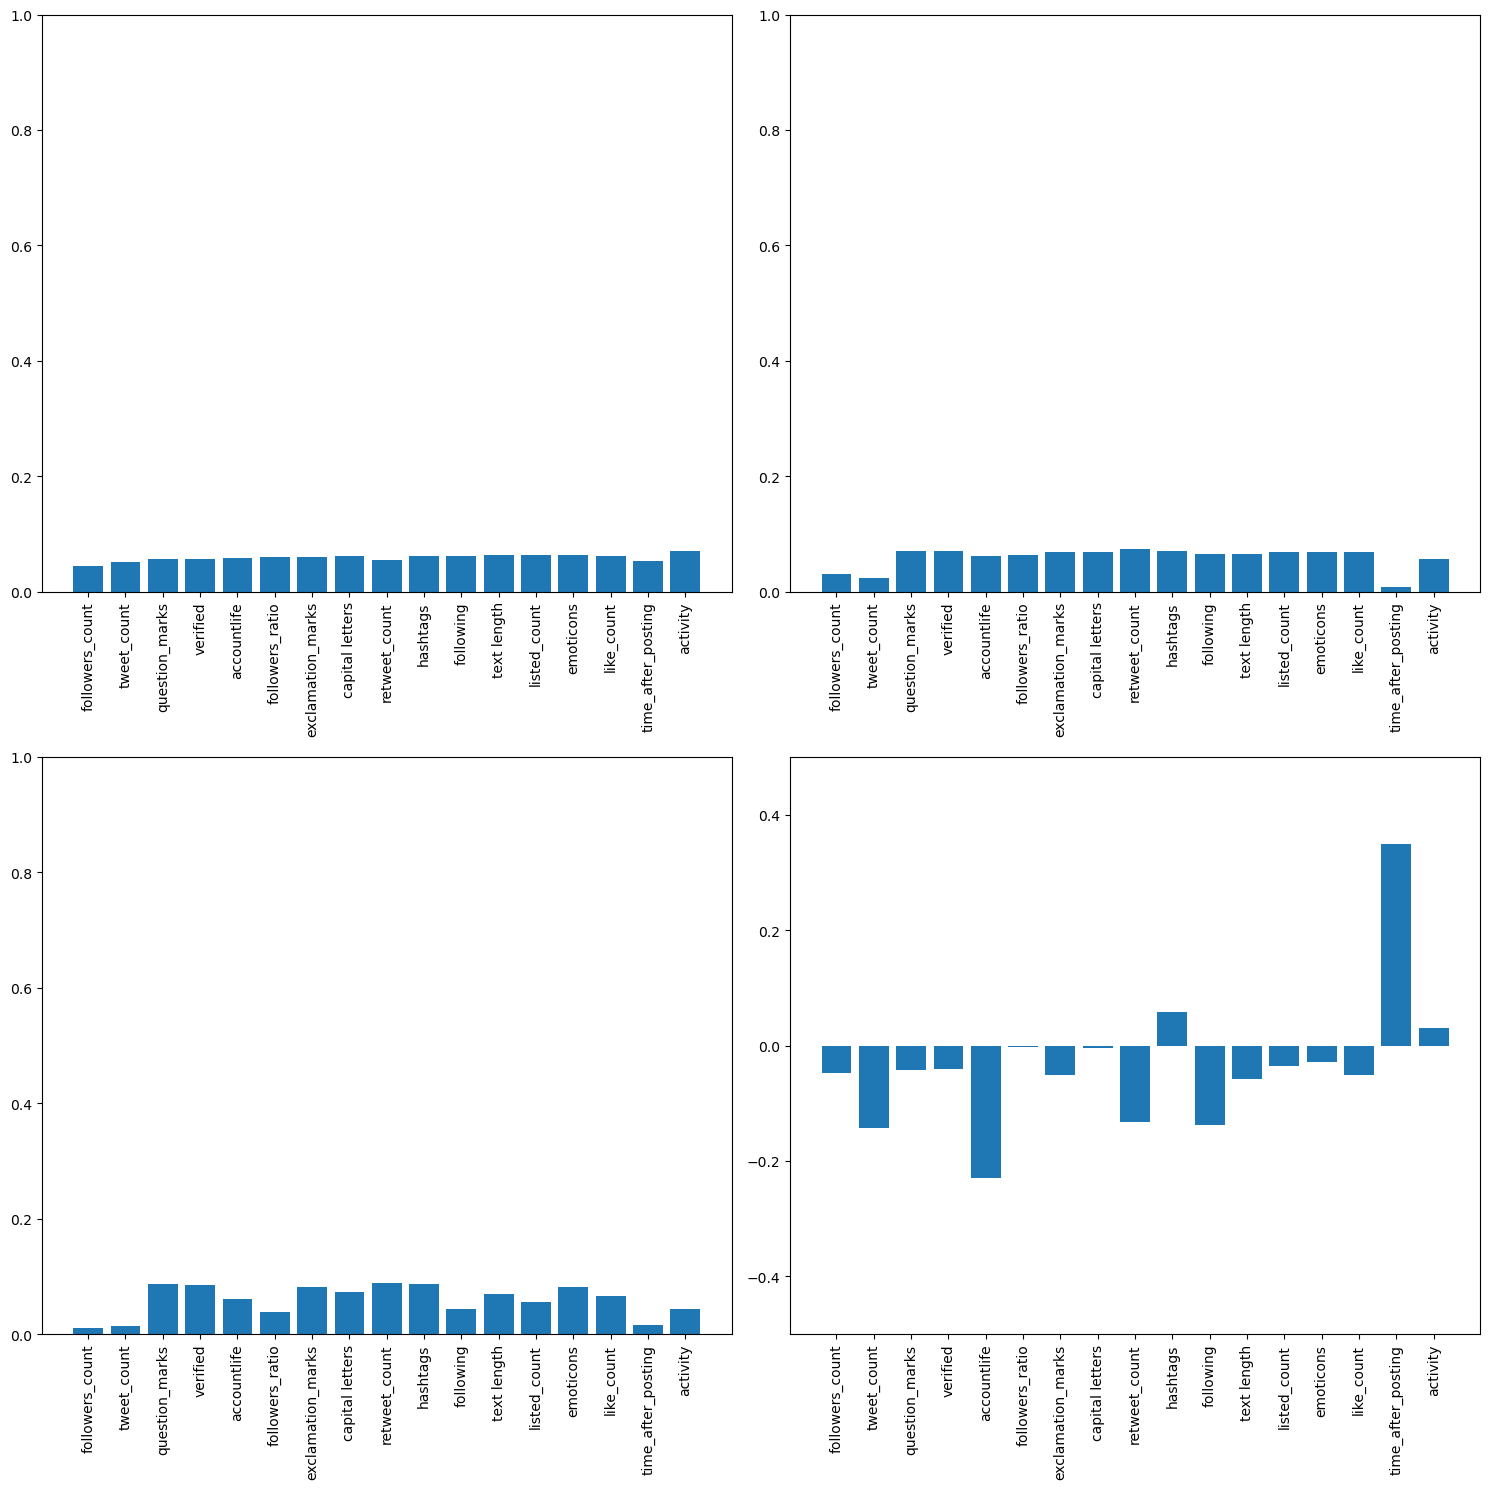

In [139]:
plt.figure(figsize=(6,6))
fig, axes = plt.subplots(2,2, figsize=(15,15))

axes[0][0].bar(model.feature_names_in_, xgb_avg_feature_importances)
axes[0][0].set_xticks(ticks=range(len(model.feature_names_in_)), labels=model.feature_names_in_, rotation=90)
axes[0][0].set_ylim(0,1)


axes[0][1].bar(model.feature_names_in_, rf_avg_feature_importances)
axes[0][1].set_xticks(ticks=range(len(model.feature_names_in_)), labels=model.feature_names_in_, rotation=90)
axes[0][1].set_ylim(0,1)

axes[1][0].bar(model.feature_names_in_, gbc_avg_feature_importances)
axes[1][0].set_xticks(ticks=range(len(model.feature_names_in_)), labels=model.feature_names_in_, rotation=90)
axes[1][0].set_ylim(0,1)

axes[1][1].bar(model.feature_names_in_, lsvm_avg_feature_importances)
axes[1][1].set_xticks(ticks=range(len(model.feature_names_in_)), labels=model.feature_names_in_, rotation=90)
axes[1][1].set_ylim(-0.5,0.5)

fig.tight_layout()

plt.show()    
fig.savefig("featureimportances.pdf")

In [110]:
#LinearSVM
output = []
ks = list(range(1,len(columns[:-4])))
auc_scores = []

overallFeatureScores = dict()
for feature in columns[:-4]:
    overallFeatureScores[feature] = 0


for k in range(1,len(columns[:-4])):
    avgauc = []
    for i in range(0,10):

        df_labeled=df[df["label"]!=-1]
        df_train, df_test = train_test_split(df_labeled, test_size=0.2)

        df_train.reset_index(drop=True)

        # Put test data into an array
        X_test=df_test.reset_index(drop=True)
        X_test = upsample(X_test).drop(["hashtag", "upsample_group", "text","index"], axis=1)
        y_test = X_test["label"].astype(float)
        X_test = X_test.drop(["label"],axis=1).astype(float)

        model = SVC(kernel='linear',
                                    probability=True,
                                    C=1.0,
                                    max_iter = 1000,
                                    gamma='scale',
                               )
        kf5 = KFold(n_splits=5, shuffle=False)
        rn = range(1,len(df_train))
        i = 1
        for train_index, test_index in kf5.split(rn):
            X_train = df_train.iloc[train_index].reset_index(drop=True)
            X_train = upsample(X_train).drop(["hashtag", "upsample_group", "text","index"], axis=1)
            y_train = X_train["label"].astype(float)
            X_train = X_train.drop(["label"], axis = 1).astype(float)
            #upsample

            X_val = df_train.iloc[test_index].reset_index(drop=True)
            X_val = upsample(X_val).drop(["hashtag", "upsample_group", "text","index"], axis=1).astype(float)
            y_val = X_val["label"].astype(float)
            X_val = X_val.drop(["label"], axis = 1).astype(float)
            #upsample

            bestfeatures = SelectKBest(score_func=chi2, k=k)
            fit = bestfeatures.fit(X_val,y_val)
            dfscores = pd.DataFrame(fit.scores_)
            dfcolumns = pd.DataFrame(X_val.columns)

            #concat two dataframes
            featureScores = pd.concat([dfcolumns,dfscores],axis=1)
            featureScores.columns = ['Feature','Score']  #naming the dataframe columns

            model.fit(X_train[list(featureScores.sort_values(by="Score")["Feature"])[-k:]],y_train)

            for feature in columns[:-4]:
                overallFeatureScores[feature] += float(featureScores[featureScores["Feature"] == feature]["Score"])
            i += 1

        mostimportantfeatures = sorted(overallFeatureScores, key=overallFeatureScores.get, reverse=True)[0:k]
        avgauc.append(roc_auc_score(y_test, model.predict(X_test[mostimportantfeatures])))
    auc_scores.append(sum(avgauc)/len(avgauc))

lsvm_auc = auc_scores

In [111]:
#non linear SVM
output = []
ks = list(range(1,len(columns[:-4])))
auc_scores = []
overallFeatureScores = dict()
for feature in columns[:-4]:
    overallFeatureScores[feature] = 0


for k in range(1,len(columns[:-4])):
    avgauc = []
    for i in range(0,10):

        df_labeled=df[df["label"]!=-1]
        df_train, df_test = train_test_split(df_labeled, test_size=0.2)

        df_train.reset_index(drop=True)

        # Put test data into an array
        X_test=df_test.reset_index(drop=True)
        X_test = upsample(X_test).drop(["hashtag", "upsample_group", "text","index"], axis=1)
        y_test = X_test["label"].astype(float)
        X_test = X_test.drop(["label"],axis=1).astype(float)

        #upsample
        model = SVC(kernel='rbf',
                                probability=True,
                                C=1.0, 
                                max_iter = 1000,
                                gamma='scale',
                           )
        kf5 = KFold(n_splits=5, shuffle=False)
        rn = range(1,len(df_train))
        i = 1
        for train_index, test_index in kf5.split(rn):
            X_train = df_train.iloc[train_index].reset_index(drop=True)
            X_train = upsample(X_train).drop(["hashtag", "upsample_group", "text","index"], axis=1)
            y_train = X_train["label"].astype(float)
            X_train = X_train.drop(["label"], axis = 1).astype(float)
            #upsample

            X_val = df_train.iloc[test_index].reset_index(drop=True)
            X_val = upsample(X_val).drop(["hashtag", "upsample_group", "text","index"], axis=1).astype(float)
            y_val = X_val["label"].astype(float)
            X_val = X_val.drop(["label"], axis = 1).astype(float)
            #upsample

            bestfeatures = SelectKBest(score_func=chi2, k=k)
            fit = bestfeatures.fit(X_val,y_val)
            dfscores = pd.DataFrame(fit.scores_)
            dfcolumns = pd.DataFrame(X_val.columns)

            #concat two dataframes
            featureScores = pd.concat([dfcolumns,dfscores],axis=1)
            featureScores.columns = ['Feature','Score']  #naming the dataframe columns

            model.fit(X_train[list(featureScores.sort_values(by="Score")["Feature"])[-k:]],y_train)

            for feature in columns[:-4]:
                overallFeatureScores[feature] += float(featureScores[featureScores["Feature"] == feature]["Score"])
            i += 1

        mostimportantfeatures = sorted(overallFeatureScores, key=overallFeatureScores.get, reverse=True)[0:k]
        avgauc.append(roc_auc_score(y_test, model.predict(X_test[mostimportantfeatures])))
    auc_scores.append(sum(avgauc)/len(avgauc))


rsvm_auc = auc_scores

In [112]:
#Naive Bayes

output = []
ks = list(range(1,len(columns[:-4])))
auc_scores = []
overallFeatureScores = dict()
for feature in columns[:-4]:
    overallFeatureScores[feature] = 0


for k in range(1,len(columns[:-4])):
    avgauc = []
    for i in range(0,10):

        df_labeled=df[df["label"]!=-1]
        df_train, df_test = train_test_split(df_labeled, test_size=0.2)

        df_train.reset_index(drop=True)

        # Put test data into an array
        X_test=df_test.reset_index(drop=True)
        X_test = upsample(X_test).drop(["hashtag", "upsample_group", "text","index"], axis=1)
        y_test = X_test["label"].astype(float)
        X_test = X_test.drop(["label"],axis=1).astype(float)

        #upsample
        model = MultinomialNB(alpha=0, fit_prior=False)
        
        kf5 = KFold(n_splits=5, shuffle=False)
        rn = range(1,len(df_train))
        i = 1
        for train_index, test_index in kf5.split(rn):
            X_train = df_train.iloc[train_index].reset_index(drop=True)
            X_train = upsample(X_train).drop(["hashtag", "upsample_group", "text","index"], axis=1)
            y_train = X_train["label"].astype(float)
            X_train = X_train.drop(["label"], axis = 1).astype(float)
            #upsample

            X_val = df_train.iloc[test_index].reset_index(drop=True)
            X_val = upsample(X_val).drop(["hashtag", "upsample_group", "text","index"], axis=1).astype(float)
            y_val = X_val["label"].astype(float)
            X_val = X_val.drop(["label"], axis = 1).astype(float)
            #upsample

            bestfeatures = SelectKBest(score_func=chi2, k=k)
            fit = bestfeatures.fit(X_val,y_val)
            dfscores = pd.DataFrame(fit.scores_)
            dfcolumns = pd.DataFrame(X_val.columns)

            #concat two dataframes
            featureScores = pd.concat([dfcolumns,dfscores],axis=1)
            featureScores.columns = ['Feature','Score']  #naming the dataframe columns

            model.fit(X_train[list(featureScores.sort_values(by="Score")["Feature"])[-k:]],y_train)

            for feature in columns[:-4]:
                overallFeatureScores[feature] += float(featureScores[featureScores["Feature"] == feature]["Score"])
            i += 1

        mostimportantfeatures = sorted(overallFeatureScores, key=overallFeatureScores.get, reverse=True)[0:k]
        avgauc.append(roc_auc_score(y_test, model.predict(X_test[mostimportantfeatures])))
    auc_scores.append(sum(avgauc)/len(avgauc))

mnb_auc = auc_scores

In [113]:
#Gaussian Naive Bayes
output = []
ks = list(range(1,len(columns[:-4])))
auc_scores = []
overallFeatureScores = dict()
for feature in columns[:-4]:
    overallFeatureScores[feature] = 0


for k in range(1,len(columns[:-4])):
    avgauc = []
    for i in range(0,10):

        df_labeled=df[df["label"]!=-1]
        df_train, df_test = train_test_split(df_labeled, test_size=0.2)

        df_train.reset_index(drop=True)

        # Put test data into an array
        X_test=df_test.reset_index(drop=True)
        X_test = upsample(X_test).drop(["hashtag", "upsample_group", "text","index"], axis=1)
        y_test = X_test["label"].astype(float)
        X_test = X_test.drop(["label"],axis=1).astype(float)

        #upsample
        model = GaussianNB()
        
        kf5 = KFold(n_splits=5, shuffle=False)
        rn = range(1,len(df_train))
        i = 1
        for train_index, test_index in kf5.split(rn):
            X_train = df_train.iloc[train_index].reset_index(drop=True)
            X_train = upsample(X_train).drop(["hashtag", "upsample_group", "text","index"], axis=1)
            y_train = X_train["label"].astype(float)
            X_train = X_train.drop(["label"], axis = 1).astype(float)
            #upsample

            X_val = df_train.iloc[test_index].reset_index(drop=True)
            X_val = upsample(X_val).drop(["hashtag", "upsample_group", "text","index"], axis=1).astype(float)
            y_val = X_val["label"].astype(float)
            X_val = X_val.drop(["label"], axis = 1).astype(float)
            #upsample

            bestfeatures = SelectKBest(score_func=chi2, k=k)
            fit = bestfeatures.fit(X_val,y_val)
            dfscores = pd.DataFrame(fit.scores_)
            dfcolumns = pd.DataFrame(X_val.columns)

            #concat two dataframes
            featureScores = pd.concat([dfcolumns,dfscores],axis=1)
            featureScores.columns = ['Feature','Score']  #naming the dataframe columns

            model.fit(X_train[list(featureScores.sort_values(by="Score")["Feature"])[-k:]],y_train)

            for feature in columns[:-4]:
                overallFeatureScores[feature] += float(featureScores[featureScores["Feature"] == feature]["Score"])
            i += 1

        mostimportantfeatures = sorted(overallFeatureScores, key=overallFeatureScores.get, reverse=True)[0:k]
        avgauc.append(roc_auc_score(y_test, model.predict(X_test[mostimportantfeatures])))
    auc_scores.append(sum(avgauc)/len(avgauc))

    
gnb_auc = auc_scores

In [114]:
#XGBoost
output = []
ks = list(range(1,len(columns[:-4])))
auc_scores = []
overallFeatureScores = dict()
for feature in columns[:-4]:
    overallFeatureScores[feature] = 0


for k in range(1,len(columns[:-4])):
    avgauc = []
    for i in range(0,10):

        df_labeled=df[df["label"]!=-1]
        df_train, df_test = train_test_split(df_labeled, test_size=0.2)

        df_train.reset_index(drop=True)

        # Put test data into an array
        X_test=df_test.reset_index(drop=True)
        X_test = upsample(X_test).drop(["hashtag", "upsample_group", "text","index"], axis=1)
        y_test = X_test["label"].astype(float)
        X_test = X_test.drop(["label"],axis=1).astype(float)

        #upsample
        model = xgb.XGBClassifier(objective="binary:logistic")
        
        kf5 = KFold(n_splits=5, shuffle=False)
        rn = range(1,len(df_train))
        i = 1
        for train_index, test_index in kf5.split(rn):
            X_train = df_train.iloc[train_index].reset_index(drop=True)
            X_train = upsample(X_train).drop(["hashtag", "upsample_group", "text","index"], axis=1)
            y_train = X_train["label"].astype(float)
            X_train = X_train.drop(["label"], axis = 1).astype(float)
            #upsample

            X_val = df_train.iloc[test_index].reset_index(drop=True)
            X_val = upsample(X_val).drop(["hashtag", "upsample_group", "text","index"], axis=1).astype(float)
            y_val = X_val["label"].astype(float)
            X_val = X_val.drop(["label"], axis = 1).astype(float)
            #upsample

            bestfeatures = SelectKBest(score_func=chi2, k=k)
            fit = bestfeatures.fit(X_val,y_val)
            dfscores = pd.DataFrame(fit.scores_)
            dfcolumns = pd.DataFrame(X_val.columns)

            #concat two dataframes
            featureScores = pd.concat([dfcolumns,dfscores],axis=1)
            featureScores.columns = ['Feature','Score']  #naming the dataframe columns

            model.fit(X_train[list(featureScores.sort_values(by="Score")["Feature"])[-k:]],y_train)

            for feature in columns[:-4]:
                overallFeatureScores[feature] += float(featureScores[featureScores["Feature"] == feature]["Score"])
            i += 1

        mostimportantfeatures = sorted(overallFeatureScores, key=overallFeatureScores.get, reverse=True)[0:k]
        avgauc.append(roc_auc_score(y_test, model.predict(X_test[mostimportantfeatures])))
    auc_scores.append(sum(avgauc)/len(avgauc))


xgb_auc = auc_scores


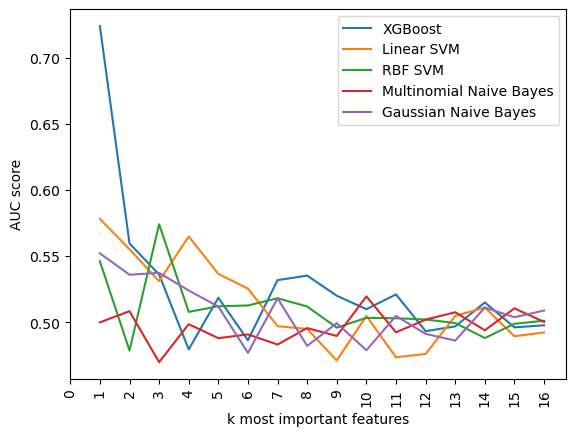

In [133]:
fig = plt.gcf()
plt.plot(ks, xgb_auc, label="XGBoost")
plt.plot(ks, lsvm_auc, label="Linear SVM")
plt.plot(ks, rsvm_auc, label="RBF SVM")
plt.plot(ks, mnb_auc, label="Multinomial Naive Bayes")
plt.plot(ks, gnb_auc, label="Gaussian Naive Bayes")
plt.xticks(ticks=range(0,len(columns[:-4])), labels=range(0,len(columns[:-4])), rotation=90)
plt.ylabel("AUC score")
plt.xlabel("k most important features")
plt.legend()
plt.show()
fig.savefig("top_k_features_and_AUC.pdf")